<a href="https://colab.research.google.com/github/ricksolis/zillow-real_estate_data_cleaning/blob/main/2_EDA_of_Zillow_Housing_(Median_Sales_Price_and_Inventory).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of Zillow Housing Data

In [1]:
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels
import statsmodels.api as sm

Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (0.29.21)
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-ivcrfe0x
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-ivcrfe0x
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for statsmodels: filename=statsmodels-0.13.0.dev0+176.g789c19462-cp36-cp36m-linux_x86_64.whl size=17976254 sha256=266c62323f152311ec15ecc75ae9c3b06a523fbaf68dfe4f61fa633d9b7132b9
  Stored in directory: /tmp/pip-ephem-wheel-cache-ry7de8_3/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


There were issues with loading statsmodel in google colab. The suggested fix from [here](https://stackoverflow.com/questions/56253309/how-to-fix-google-colab-import-errors-on-statsmodels-logsumexp-and-factorial), seemed to fix the problem. 

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams

Loading the clean data first from Google Colab. 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filename_median = 'clean_med-price_tx.csv'
filename_inventory = 'clean_inv_tx.csv'
data_path = '/content/drive/My Drive/colab/zillow/data/processed/'

In [5]:
df_inv = pd.read_csv(data_path + filename_inventory, parse_dates=True, index_col='date')

In [6]:
df_med = pd.read_csv(data_path + filename_median, parse_dates=True, index_col='date')

In [7]:
df_inv.head()

,Dallas-Fort Worth_Inv,Houston_Inv,San Antonio_Inv,Austin_Inv,El Paso_Inv,McAllen_Inv
date,,,,,,
2017-10-14,22104.0,27046.0,8610.0,6827.0,3894.0,1856.0
2017-10-21,21804.0,26909.0,8624.0,6859.0,3958.0,1885.0
2017-10-28,21751.0,26654.0,8487.0,6713.0,3951.0,1908.0
2017-11-04,21687.0,26531.0,8491.0,6622.0,3935.0,1910.0
2017-11-11,20961.0,26269.0,8367.0,6377.0,3951.0,1866.0


In [8]:
df_med.head()

,Dallas-Fort Worth_Med,Houston_Med,San Antonio_Med,Austin_Med,El Paso_Med,McAllen_Med
date,,,,,,
2008-02-02,145712.0,157390.0,152950.0,208791.0,137250.0,NaN
2008-02-09,147000.0,149000.0,149000.0,189200.0,142500.0,NaN
2008-02-16,140500.0,145896.0,146598.0,183500.0,127400.0,NaN
2008-02-23,144350.0,155089.0,144939.0,179965.0,136000.0,NaN
2008-03-01,148900.0,158000.0,149000.0,186000.0,135000.0,NaN


## Dickey - Fuller Test
A Dickey Fuller test will be used to determine if the data is stationary. 

In [9]:
def print_adfuller(name, params):
  print( name)
  print("                Test Statistic:   " + str(params[0]))
  print("                       p-value:   " + str(params[1]))
  print("       The number of lags used:   " + str(params[2]))
  print("   The number of obvservations:    "+ str(params[3]))
  print("Critical Values at 1%, 5%, 10%:    "+ str(params[4]))
  print()
  print()
  return

In [10]:
print_adfuller('Austin', adfuller(df_inv['Austin_Inv'].values))

Austin
                Test Statistic:   -2.328312473918098
                       p-value:   0.1629991376643769
       The number of lags used:   5
   The number of obvservations:    158
Critical Values at 1%, 5%, 10%:    {'1%': -3.4724305215713156, '5%': -2.8800127935315465, '10%': -2.576619230892485}




In [11]:
def adfullerloop(df):
  #temp = df.drop(columns='date')
  region = df.columns
  for reg in region:
    print_adfuller(reg, adfuller(df[reg].values))
  return

In [12]:
adfullerloop(df_med)

Dallas-Fort Worth_Med
                Test Statistic:   0.07373570977356969
                       p-value:   0.9642214802311534
       The number of lags used:   18
   The number of obvservations:    647
Critical Values at 1%, 5%, 10%:    {'1%': -3.4404975024933813, '5%': -2.8660174956716795, '10%': -2.569154453750397}


Houston_Med
                Test Statistic:   -0.32222034691530566
                       p-value:   0.9222977760638705
       The number of lags used:   13
   The number of obvservations:    652
Critical Values at 1%, 5%, 10%:    {'1%': -3.440419374623044, '5%': -2.865983079837035, '10%': -2.5691361169972526}


San Antonio_Med
                Test Statistic:   -0.21217895005835596
                       p-value:   0.9370542631992234
       The number of lags used:   4
   The number of obvservations:    661
Critical Values at 1%, 5%, 10%:    {'1%': -3.4402817347322583, '5%': -2.8659224464259823, '10%': -2.5691038118332603}


Austin_Med
                Test Statistic: 

MissingDataError: ignored

This error is due to the McAllen subset contains missing values. 
For the median sales price data, none of the regions are stationary. The p-value is greater than 0.05, so the null hypothesis cannot be rejected. **The data is not stationary.**

In [13]:
adfullerloop(df_inv)

Dallas-Fort Worth_Inv
                Test Statistic:   -1.551588628404203
                       p-value:   0.5078545592584179
       The number of lags used:   3
   The number of obvservations:    160
Critical Values at 1%, 5%, 10%:    {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}


Houston_Inv
                Test Statistic:   -1.423737990163652
                       p-value:   0.5708444155959341
       The number of lags used:   4
   The number of obvservations:    159
Critical Values at 1%, 5%, 10%:    {'1%': -3.472161410886292, '5%': -2.8798954259680936, '10%': -2.5765565828092245}


San Antonio_Inv
                Test Statistic:   -1.1322205245494898
                       p-value:   0.7020532332632128
       The number of lags used:   3
   The number of obvservations:    160
Critical Values at 1%, 5%, 10%:    {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}


Austin_Inv
                Test Statistic:   -2.32831

Looking at the p-values for the inventory time series, shows that all p-values are greater than 0.05. 
**The inventory time series data is not stationary.**
We cannot reject the null hypothesis. 

In [14]:
df_inv.head()

,Dallas-Fort Worth_Inv,Houston_Inv,San Antonio_Inv,Austin_Inv,El Paso_Inv,McAllen_Inv
date,,,,,,
2017-10-14,22104.0,27046.0,8610.0,6827.0,3894.0,1856.0
2017-10-21,21804.0,26909.0,8624.0,6859.0,3958.0,1885.0
2017-10-28,21751.0,26654.0,8487.0,6713.0,3951.0,1908.0
2017-11-04,21687.0,26531.0,8491.0,6622.0,3935.0,1910.0
2017-11-11,20961.0,26269.0,8367.0,6377.0,3951.0,1866.0


##  Plotting the seasonality and decomposition for the inventory data

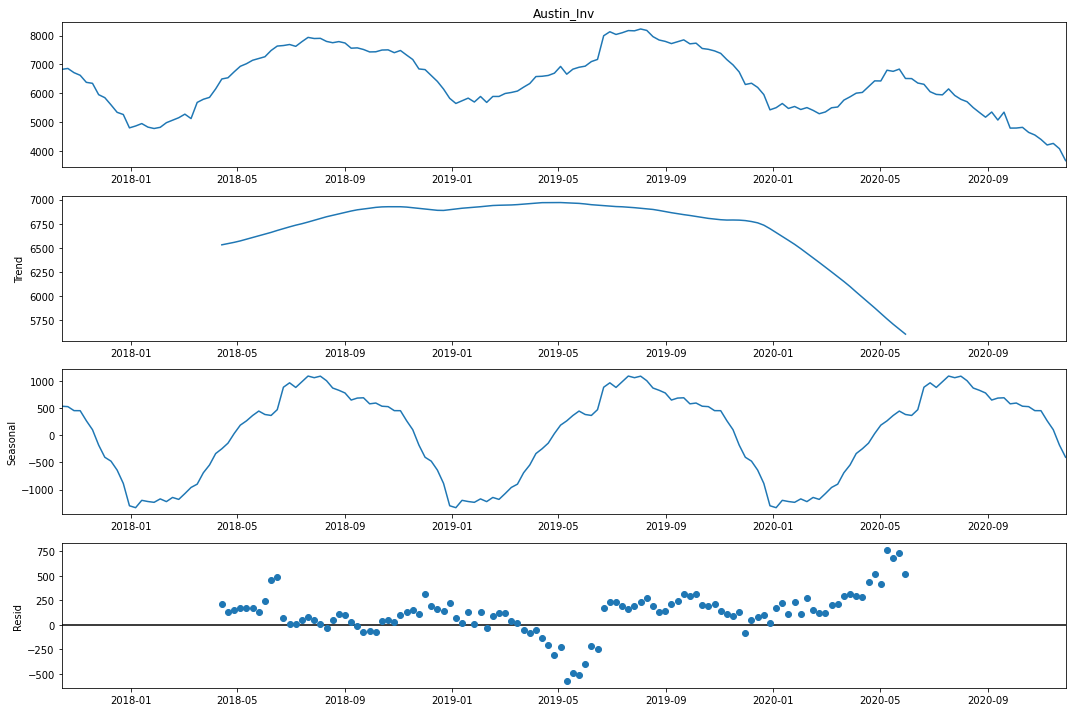

In [15]:
rcParams['figure.figsize'] = 15, 10
decomposition=sm.tsa.seasonal_decompose(df_inv['Austin_Inv'])
fig = decomposition.plot()
plt.show()

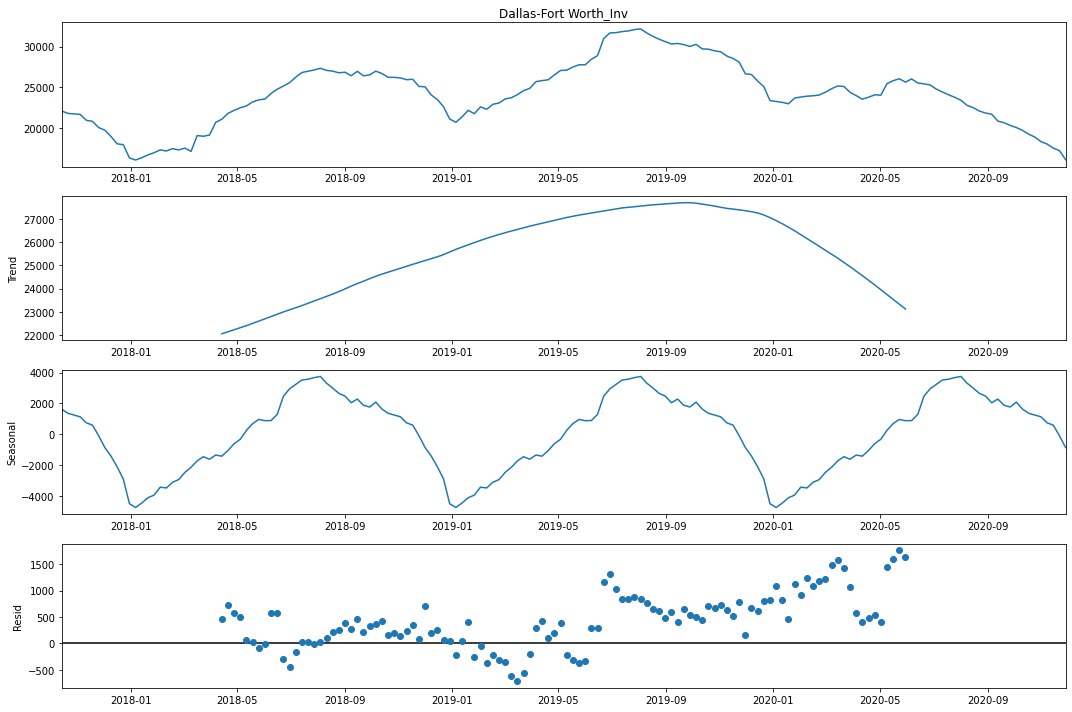

In [16]:
rcParams['figure.figsize'] = 15, 10
decomposition=sm.tsa.seasonal_decompose(df_inv['Dallas-Fort Worth_Inv'])
fig = decomposition.plot()
plt.show()

In [17]:
df_inv.columns

Index(['Dallas-Fort Worth_Inv', 'Houston_Inv', 'San Antonio_Inv', 'Austin_Inv',
       'El Paso_Inv', 'McAllen_Inv'],
      dtype='object')

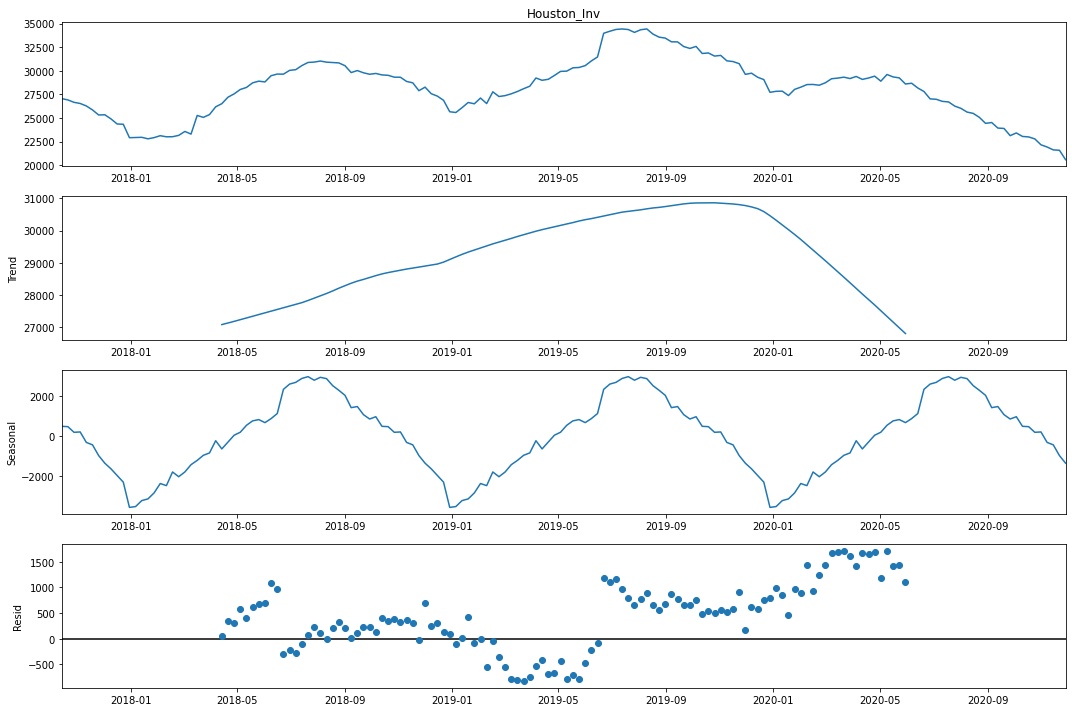

In [18]:
rcParams['figure.figsize'] = 15, 10
decomposition=sm.tsa.seasonal_decompose(df_inv['Houston_Inv'])
fig = decomposition.plot()
plt.show()

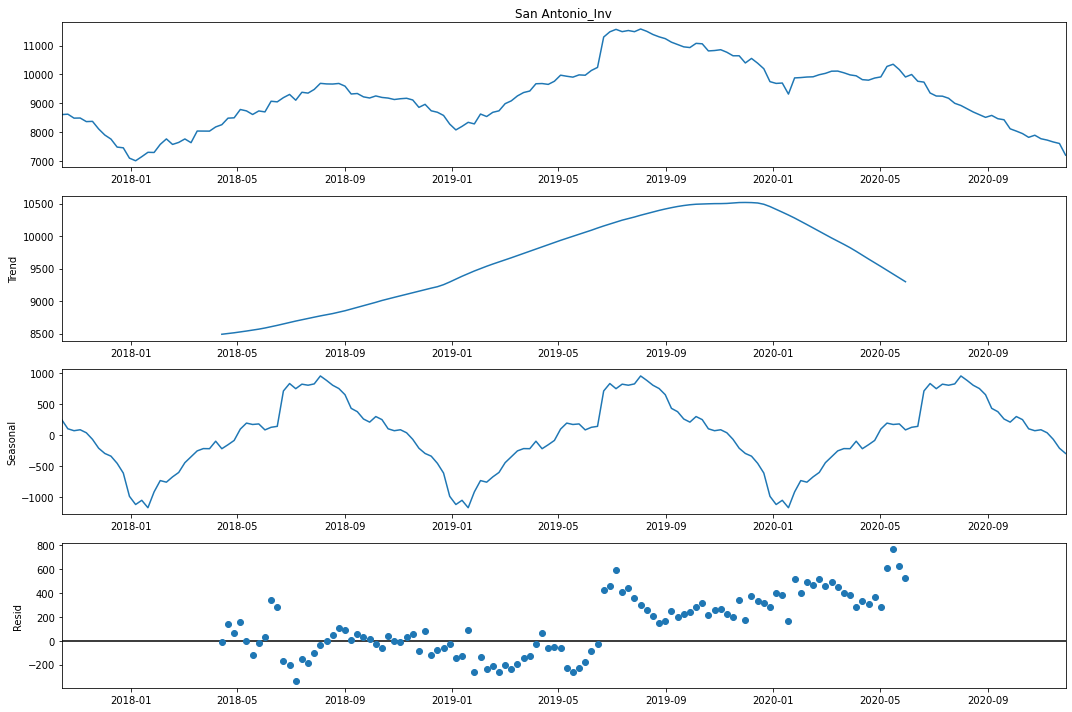

In [19]:
rcParams['figure.figsize'] = 15, 10
decomposition=sm.tsa.seasonal_decompose(df_inv['San Antonio_Inv'])
fig = decomposition.plot()
plt.show()

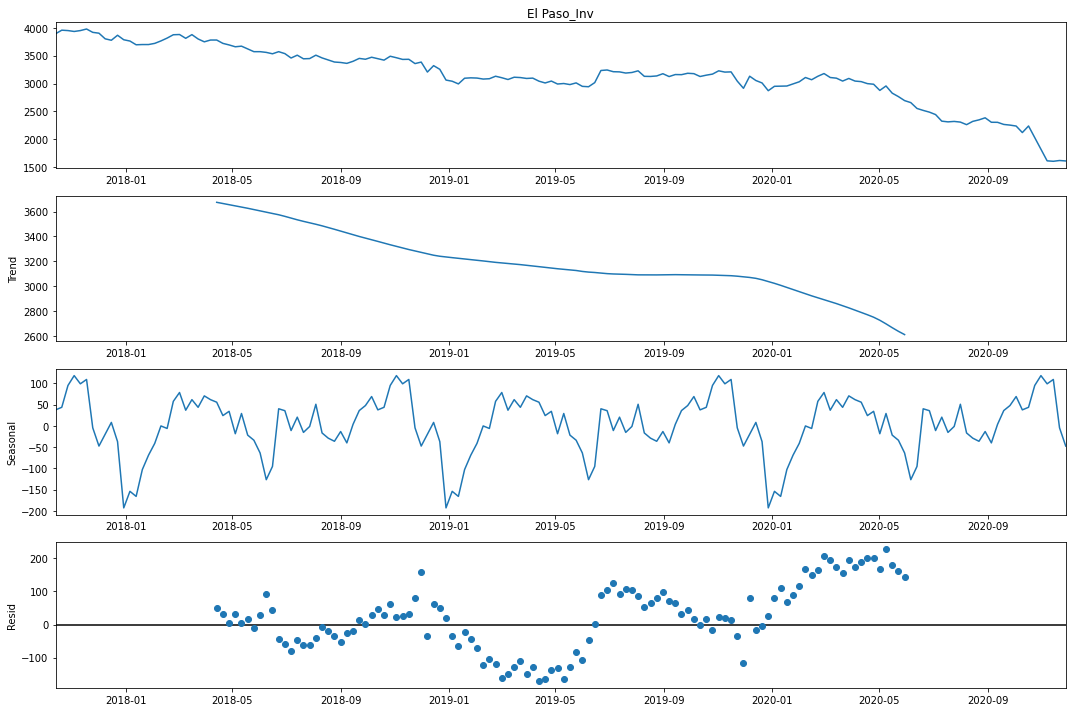

In [20]:
rcParams['figure.figsize'] = 15, 10
decomposition=sm.tsa.seasonal_decompose(df_inv['El Paso_Inv'])
fig = decomposition.plot()
plt.show()

## Plotting the seasonality and decomposition for the median sales price data

In [21]:
df_med.columns

Index(['Dallas-Fort Worth_Med', 'Houston_Med', 'San Antonio_Med', 'Austin_Med',
       'El Paso_Med', 'McAllen_Med'],
      dtype='object')

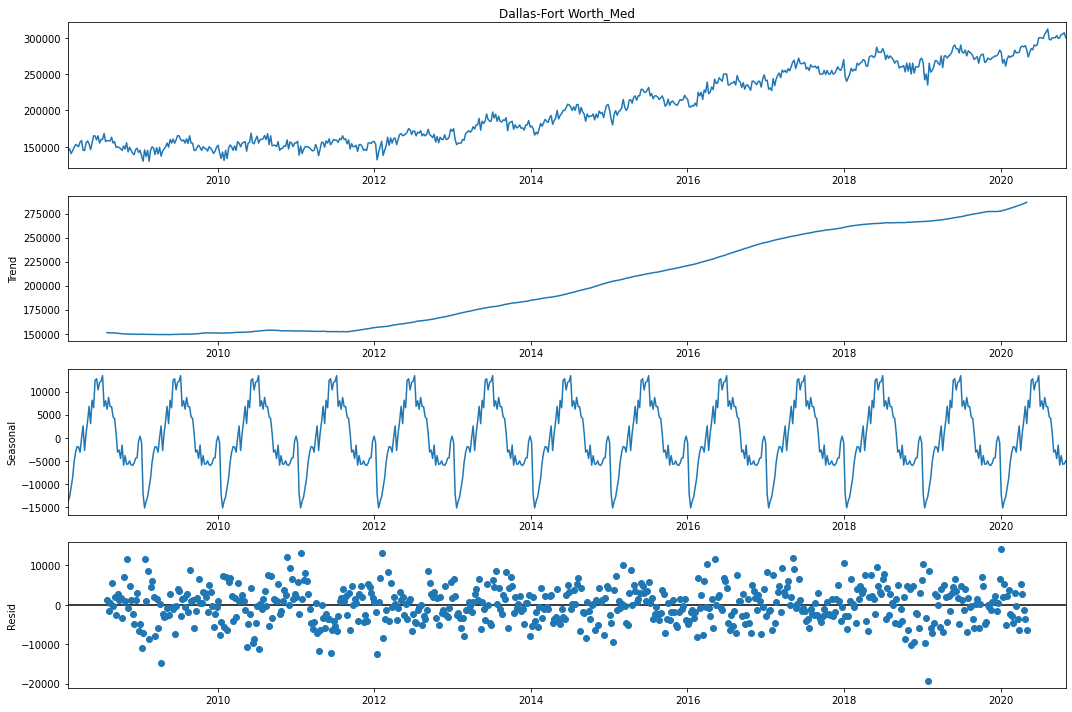

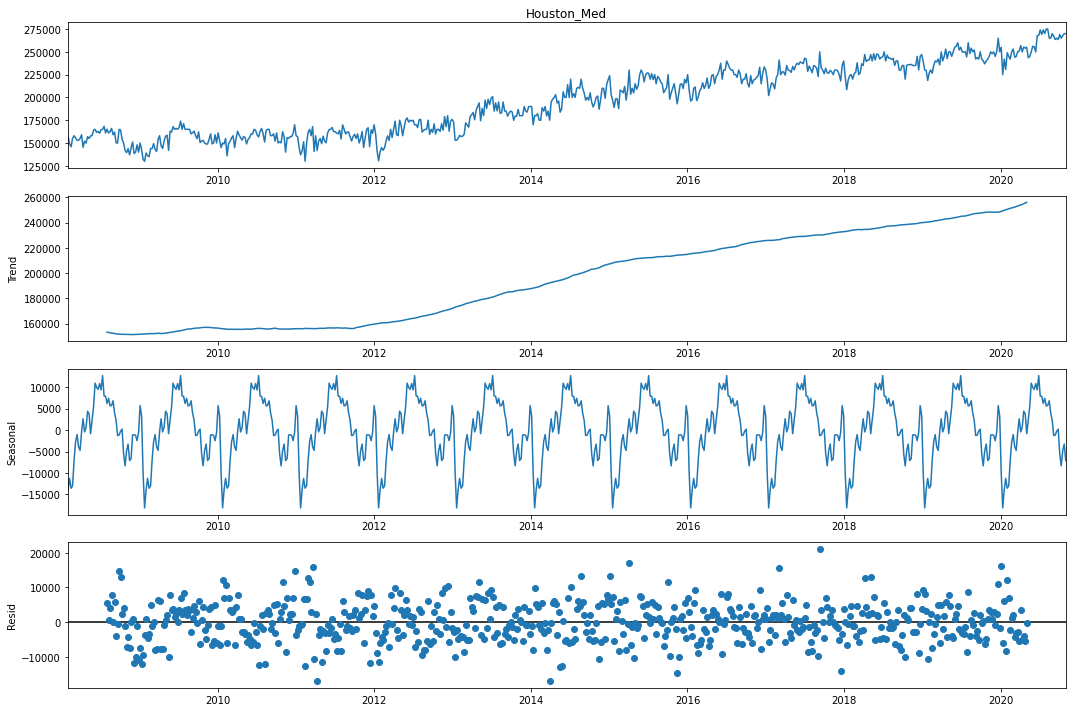

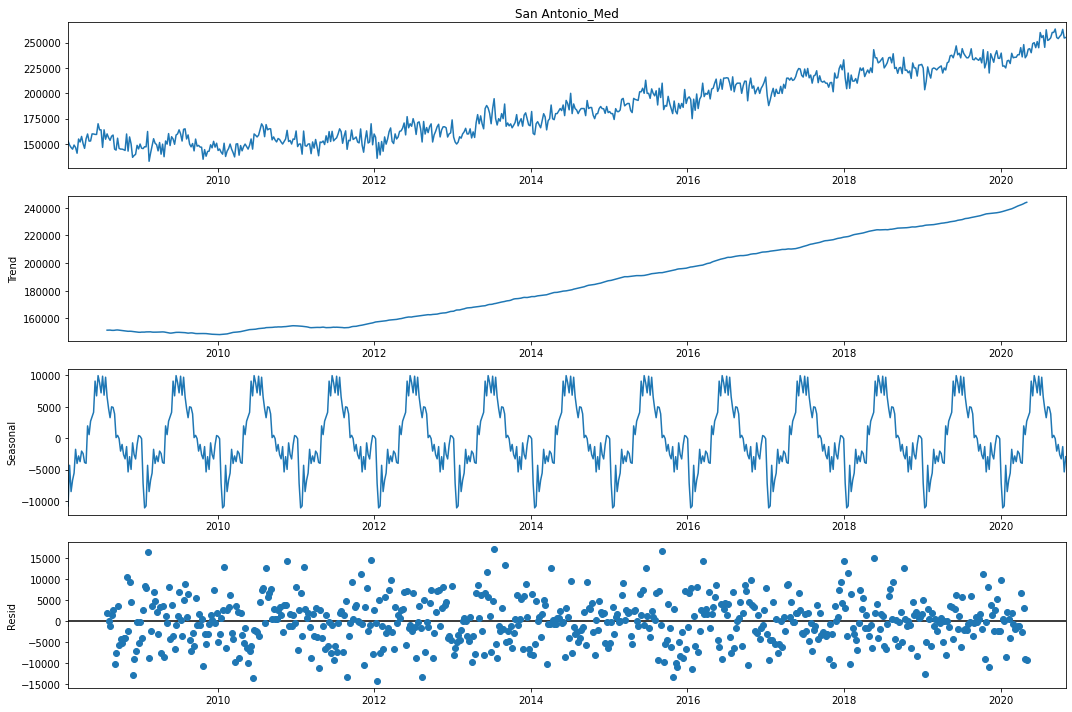

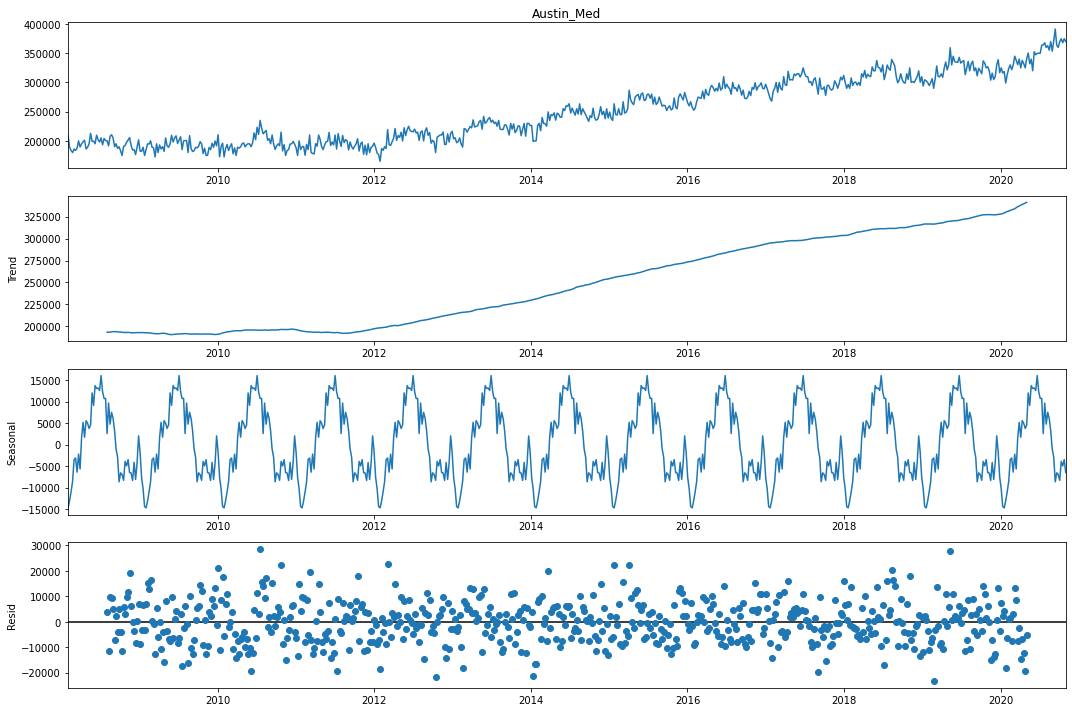

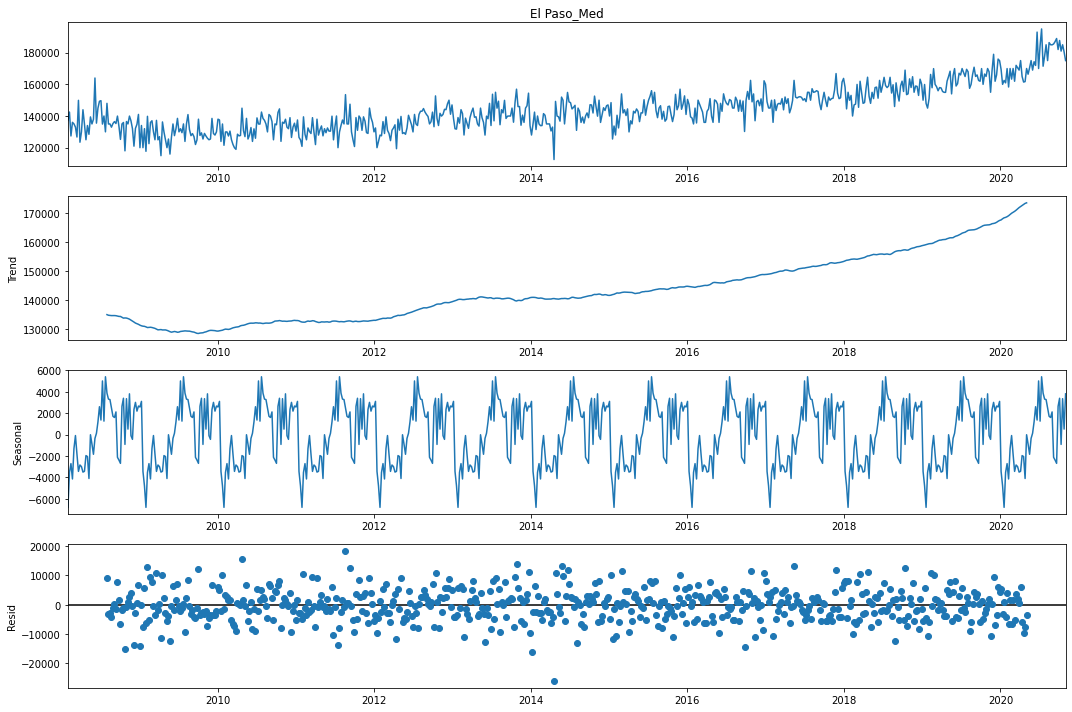

In [22]:
rcParams['figure.figsize'] = 15, 10
temp = df_med.drop(columns='McAllen_Med')
for reg in temp.columns:
  
  decomposition=sm.tsa.seasonal_decompose(temp[reg])
  fig = decomposition.plot()
plt.show()

## Plotting a clustermap of the seasonality correlation matrix

In [23]:
#we'll store the decompositions in a dictionary. 
med_decompose = {}

#We'll drop the McAllen column because the missing values will cause problems in the decomposition
med_regions = df_med.drop(columns='McAllen_Med').columns


In [24]:
#each region (ts) will be decomposed and stored in med_decompose 
for ts in med_regions:
  temp_decomposition = sm.tsa.seasonal_decompose(df_med[ts])
  med_decompose[ts] = temp_decomposition

In [25]:
median_seasonal = {}

In [26]:
#Extracting the seasonal values from the decompositions 
for ts in med_regions:
  median_seasonal[ts] = med_decompose[ts].seasonal

#Create a datafram e from the median_seaonal dictionary
median_seasonality_df = pd.DataFrame.from_dict(median_seasonal)

In [29]:
median_seasonality_df.index.name = None

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14f4cb2630>],
      dtype=object)

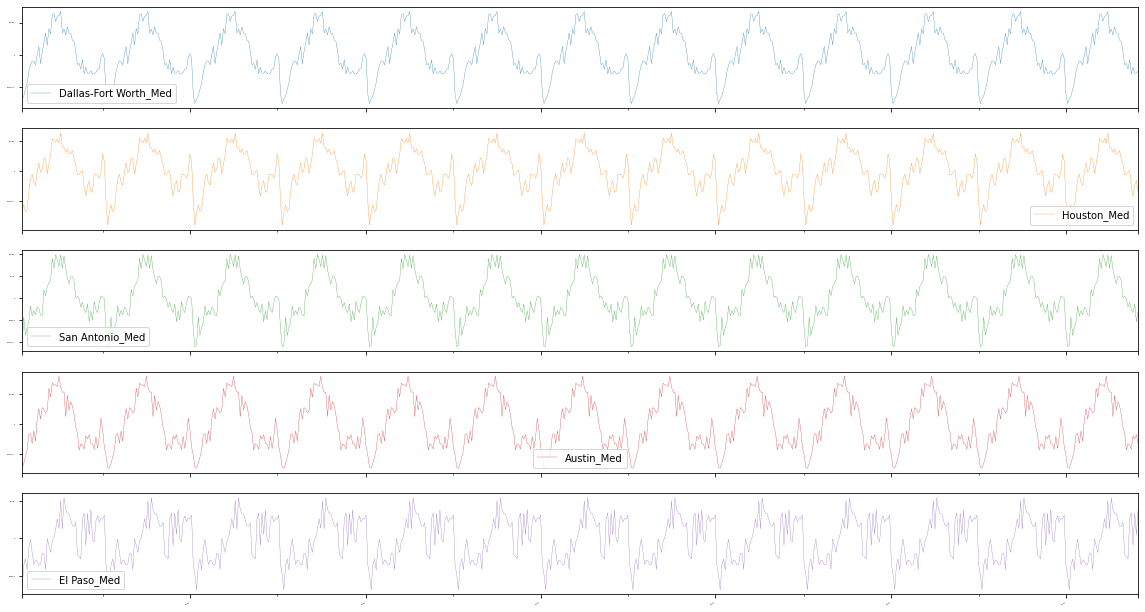

In [40]:
median_seasonality_df.plot(subplots=True,figsize=(20,12), layout = (5,1), sharey=False, fontsize=2, linewidth=.3, legend=True)

The seasonality component for Houston and DFW has some similarities. 
The seasonality component for San Antonio and Austin looks similar. 

El Paso appears to be different. 

###Generating the correlation matrix of the seasonality for the metro regions in Texas.


In [43]:
median_seasonality_corr = median_seasonality_df.corr(method='spearman')


Plotting the clustermap of the median_seasonality_corr correlation matrix

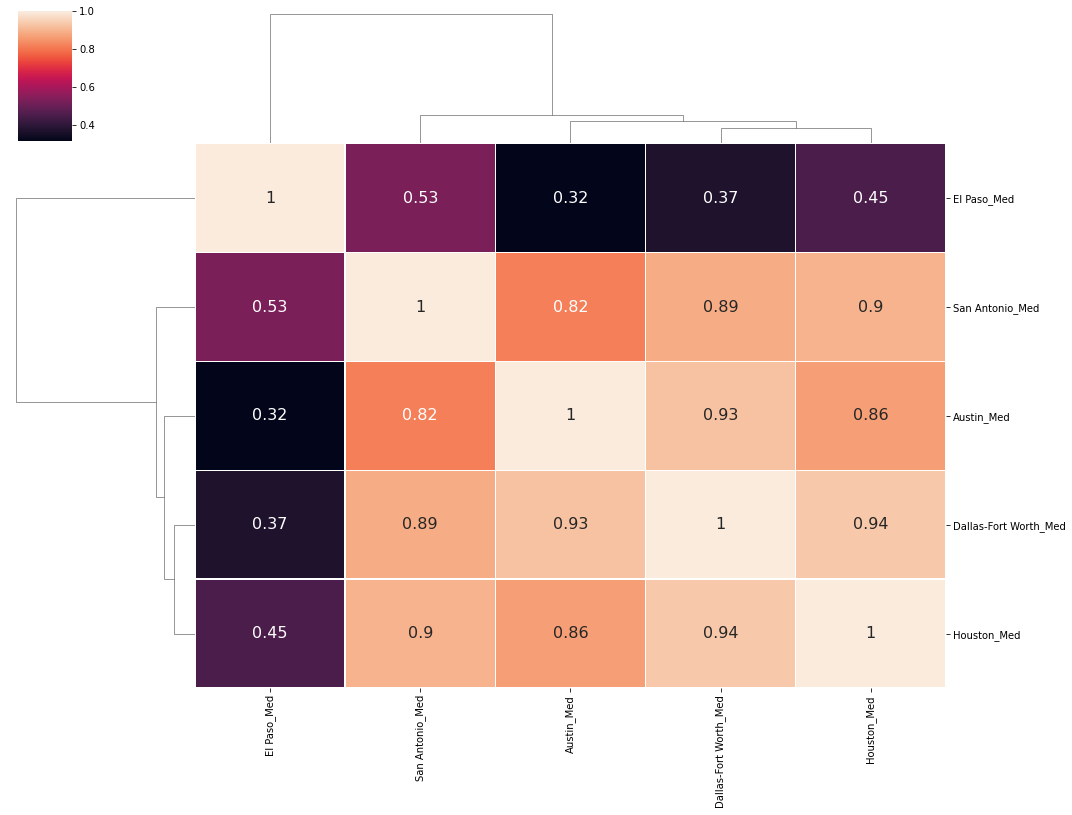

In [47]:
fig = sns.clustermap(median_seasonality_corr, annot=True, annot_kws={'size':16}, linewidths=.4, figsize=(15,10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

The seasonality in the Austin, DFW, San Antonio and Houston markets are highly correlated among each other, whereas El Paso seems to more indepedent. 

In [48]:
median_trend = {}

In [49]:
#Extracting the seasonal values from the decompositions 
for ts in med_regions:
  median_trend[ts] = med_decompose[ts].trend

#Create a datafram e from the median_seaonal dictionary
median_trend_df = pd.DataFrame.from_dict(median_trend)

In [50]:
#Create a datafram e from the median_trend dictionary
median_trend_df = pd.DataFrame.from_dict(median_trend)

In [51]:
median_trend_df.index.name = None

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14f3955160>],
      dtype=object)

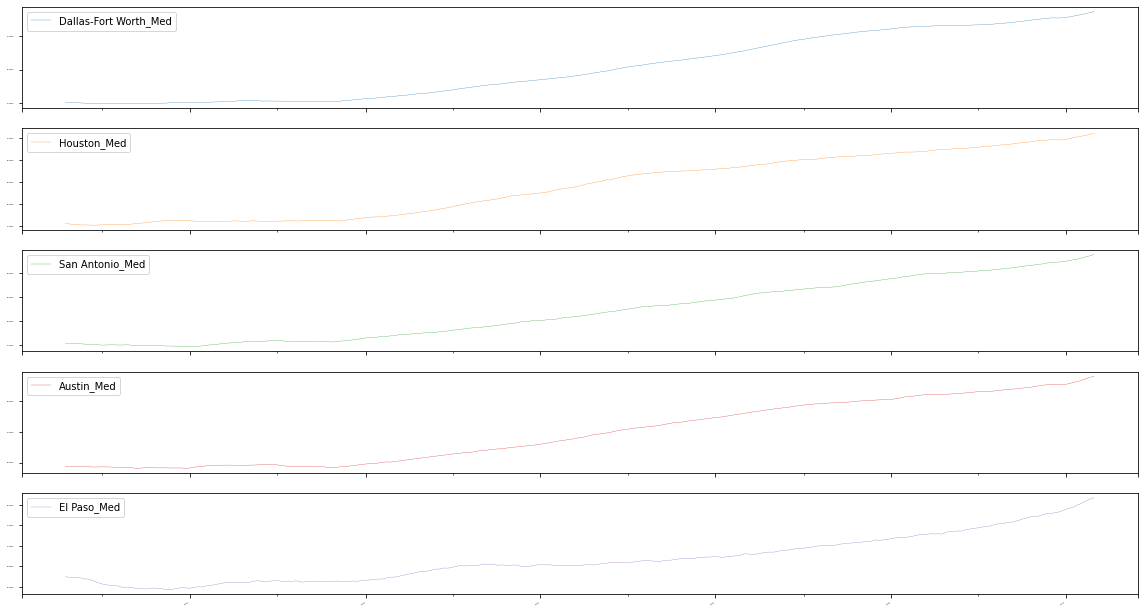

In [52]:
median_trend_df.plot(subplots=True,figsize=(20,12), layout = (5,1), sharey=False, fontsize=2, linewidth=.3, legend=True)

In [53]:
median_trend_corr = median_trend_df.corr(method='spearman')

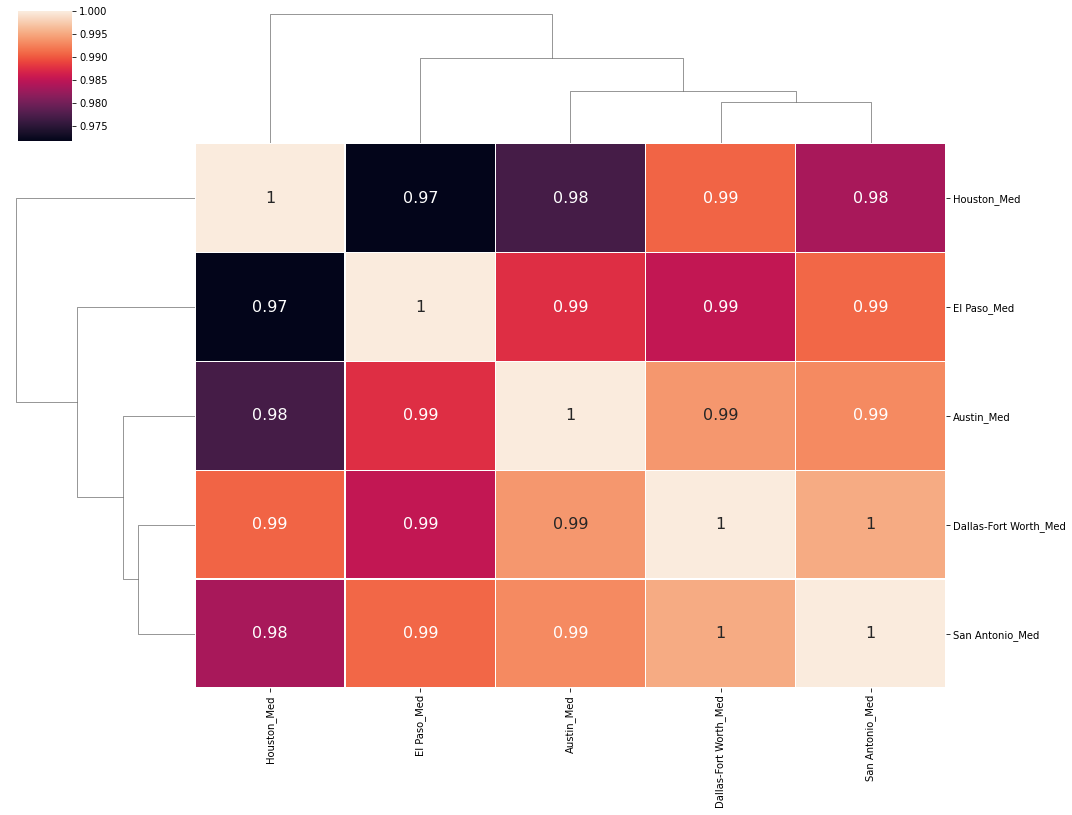

In [54]:
fig = sns.clustermap(median_trend_corr, annot=True, annot_kws={'size':16}, linewidths=.4, figsize=(15,10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

## Working with the weekly inventory time series data for the Texas Metro Regions

In [58]:
# The inventory trend and seasonal data for all the metro regions will be stored in these dictionaries. 
inventory_trend = {}
inventory_seasonal = {}
inventory_decompose = {}

In [57]:
inventory_regions = df_inv.columns

In [59]:
for ts in inventory_regions:
  #inventory_trend[ts] = inventory_decompose[ts].trend
  temp_decomposition = sm.tsa.seasonal_decompose(df_inv[ts])
  inventory_decompose[ts] = temp_decomposition
  inventory_trend[ts] = inventory_decompose[ts].trend
  inventory_seasonal[ts] = inventory_decompose[ts].seasonal

#Create a dataframe from the inventory_trend dictionary
inventory_trend_df = pd.DataFrame.from_dict(inventory_trend)
inventory_trend_df.index.name = None

# Createa  dataframe from the inventory seasonality dictionary
inventory_seasonality_df = pd.DataFrame.from_dict(inventory_seasonal)
inventory_seasonality_df.index.name = None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14f362e7f0>],
      dtype=object)

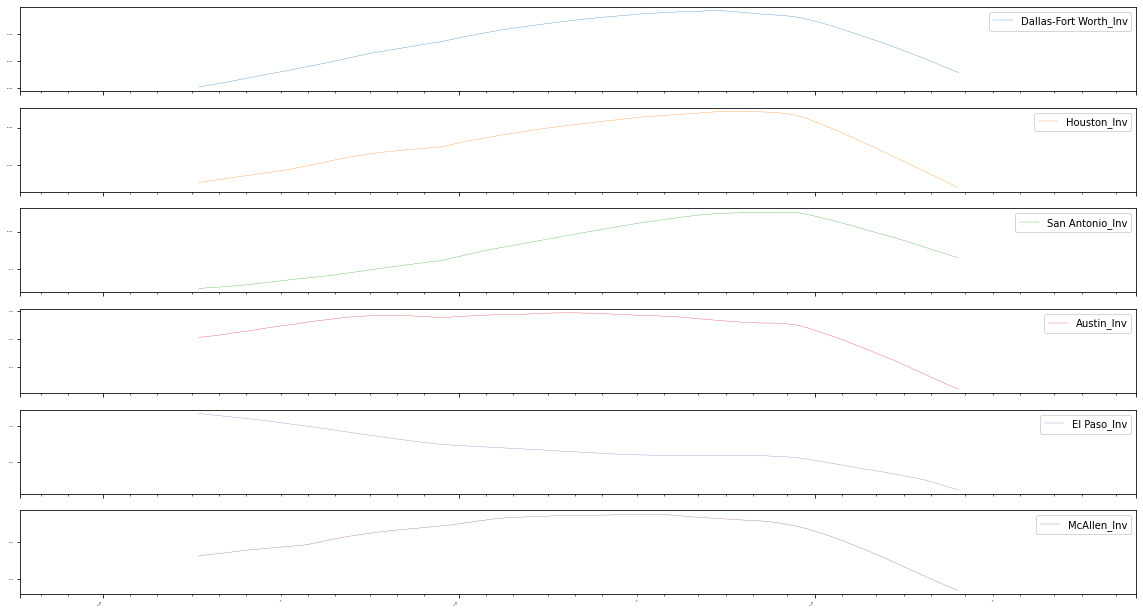

In [61]:
inventory_trend_df.plot(subplots=True,figsize=(20,12), layout = (6,1), sharey=False, fontsize=2, linewidth=.3, legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14f311f908>],
      dtype=object)

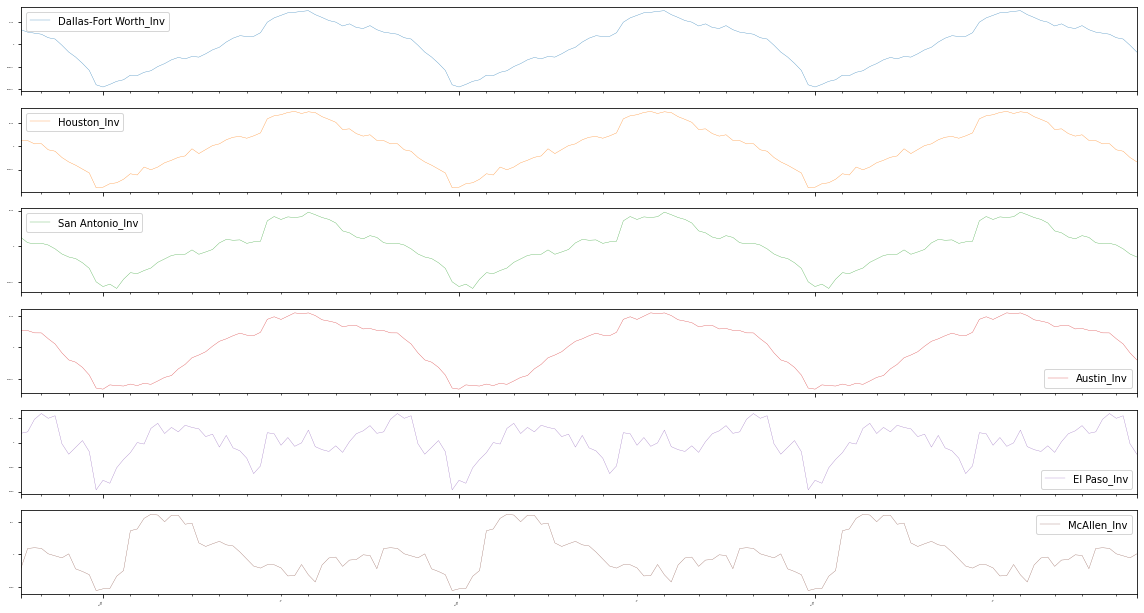

In [62]:
inventory_seasonality_df.plot(subplots=True,figsize=(20,12), layout = (6,1), sharey=False, fontsize=2, linewidth=.3, legend=True)

El Paso and McAllen have a different seasonality than the other metro regions in Texas. 

In [63]:
inventory_trend_corr = inventory_trend_df.corr(method='spearman')
inventory_seasonality_corr = inventory_seasonality_df.corr(method='spearman')

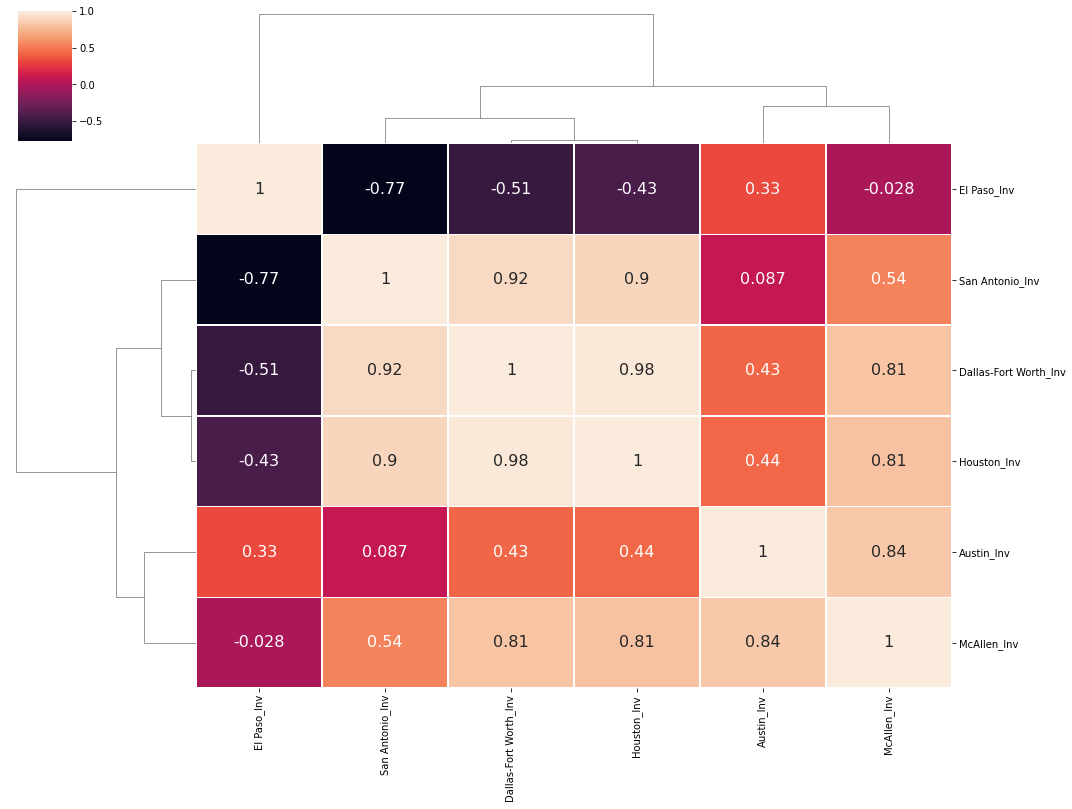

In [64]:
fig = sns.clustermap(inventory_trend_corr, annot=True, annot_kws={'size':16}, linewidths=.4, figsize=(15,10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

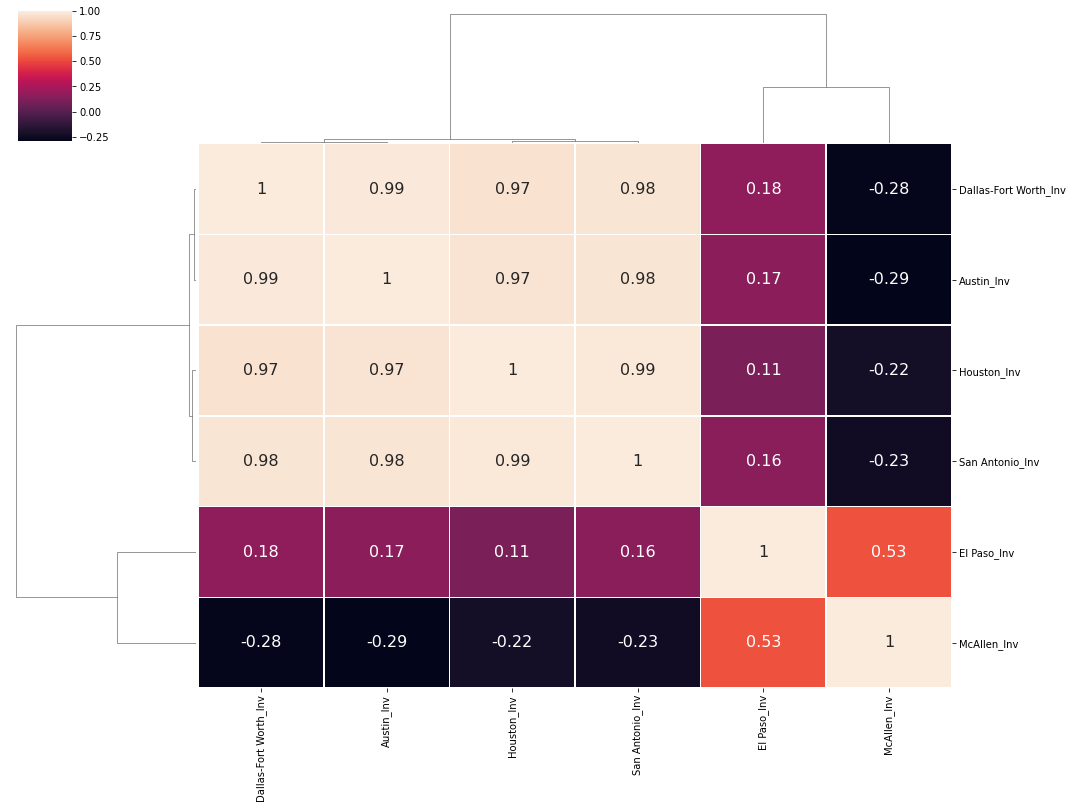

In [65]:
fig = sns.clustermap(inventory_seasonality_corr, annot=True, annot_kws={'size':16}, linewidths=.4, figsize=(15,10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

It's interesting that the seasonality within the McAllen data is negatively correlated with the major metro regions in Texas. 